In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [9]:
df = pd.read_csv('./data/universe_code.csv')
df.head()

,종목명,현재가,대비,대비(%),거래량,L(일봉)H,종목코드,거래량 (G),거래대금(만원) (H),매출액 영업이익률(%) (L),결산기준 (L),매출액 순이익률(%) (M),결산기준 (M),매출액(백만원) (A1),결산기준 (A1),매출액(백만원) (B1),결산기준 (B1),매출액(백만원) (C1),결산기준 (C1)
0,DL,"78,300","-2,000",-2.49,"341,200",-2.49,A000210,"341,200","2,665,082",11.65,Dec-19,7.32,Dec-19,"9,700,078",Dec-19,"10,984,485",Dec-18,"12,335,536",Dec-17
1,유유제약,"12,400",-250,-1.98,"33,195",-1.98,A000220,"33,195","41,476",8.89,Dec-19,6.12,Dec-19,"90,877",Dec-19,"83,096",Dec-18,"62,852",Dec-17
2,한국앤컴퍼니,"17,000",-300,-1.73,"350,644",-1.73,A000240,"350,644","590,353",20.16,Dec-19,19.26,Dec-19,"847,609",Dec-19,"847,957",Dec-18,"824,846",Dec-17
3,삼천당제약,"55,800","-3,200",-5.42,"821,467",-5.42,A000250,"821,467","4,551,879",13.51,Dec-19,10.50,Dec-19,"186,602",Dec-19,"159,960",Dec-18,"160,587",Dec-17
4,SK하이닉스,"140,000","-2,000",-1.41,"6,091,444",-1.41,A000660,"6,091,444","84,427,125",10.05,Dec-19,7.47,Dec-19,"26,990,733",Dec-19,"40,445,066",Dec-18,"30,109,434",Dec-17


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   종목명               508 non-null    object 
 1   현재가               508 non-null    object 
 2   대비                483 non-null    object 
 3   대비(%)             508 non-null    float64
 4   거래량               508 non-null    object 
 5   L(일봉)H            508 non-null    float64
 6   종목코드              508 non-null    object 
 7   거래량 (G)           508 non-null    object 
 8   거래대금(만원) (H)      508 non-null    object 
 9   매출액 영업이익률(%) (L)  508 non-null    float64
 10  결산기준 (L)          508 non-null    object 
 11  매출액 순이익률(%) (M)   508 non-null    float64
 12  결산기준 (M)          508 non-null    object 
 13  매출액(백만원) (A1)     508 non-null    object 
 14  결산기준 (A1)         508 non-null    object 
 15  매출액(백만원) (B1)     508 non-null    object 
 16  결산기준 (B1)         508 non-null    object 
 1

In [25]:
codes = df.종목코드.apply(lambda x : x[1:]).values
codes

array(['000210', '000220', '000240', '000250', '000660', '000990',
       '001340', '001390', '001500', '001750', '001800', '001820',
       '001880', '002310', '002350', '002390', '002870', '003090',
       '003220', '003410', '003530', '003550', '003670', '003780',
       '003850', '004000', '004170', '004490', '004590', '005290',
       '005670', '005690', '005880', '005930', '006060', '006220',
       '006390', '006400', '006620', '006650', '006740', '007330',
       '007340', '007570', '007700', '008490', '009150', '009420',
       '009780', '009970', '010050', '010130', '010240', '010640',
       '010780', '011040', '011170', '011330', '011780', '012330',
       '012510', '012630', '012700', '012750', '012790', '013030',
       '013120', '013810', '013890', '014570', '014680', '014830',
       '015230', '015710', '016090', '016360', '016580', '016600',
       '016610', '017040', '017510', '017890', '017960', '018250',
       '018260', '018310', '019550', '020000', '020150', '0207

In [37]:
# request 실패
res = requests.get('https://finance.naver.com/item/coinfo.nhn?code=005930')
soup = BeautifulSoup(res.text,'html.parser')
soup.select('#cns_Tab22')

[]

In [ ]:
# selenium 실패
driver = webdriver.Chrome()
driver.get('https://finance.naver.com/item/coinfo.nhn?code=005930')
driver.find_element_by_id('cns_Tab22').click()
time.sleep(1)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

In [38]:
# iframe src 실패

url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930'
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')
soup.select('#cns_Tab22')

[<a href="javascript:;" id="cns_Tab22" title="분기">분기</a>]

In [67]:
# iframe src + selenium
driver = webdriver.Chrome()
driver.get('https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=000220')
driver.find_element_by_id('cns_Tab22').click()
time.sleep(1)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_6412/70922986.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


In [70]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
tables = pd.read_html(html, encoding = 'utf-8')

In [72]:
tables[12]

주요재무정보                분기                                      \
        주요재무정보 2020/09  (IFRS연결) 2020/12  (IFRS연결) 2021/03  (IFRS연결)   
0          매출액            255.00            247.00            265.00   
1         영업이익             15.00              1.00              5.00   
2   영업이익(발표기준)             15.00              1.00              5.00   
3     세전계속사업이익             10.00             -5.00              7.00   
4        당기순이익             10.00             -4.00              5.00   
5    당기순이익(지배)              7.00             -5.00              3.00   
6   당기순이익(비지배)              3.00              1.00              3.00   
7         자산총계           1500.00           1549.00           1601.00   
8         부채총계            490.00            379.00            445.00   
9         자본총계           1010.00           1170.00           1157.00   
10    자본총계(지배)            981.00           1144.00           1127.00   
11   자본총계(비지배)             29.00             27.00             29.00   
12         자본금             88.00             97.00            185.00   
13    영업활동현금흐름            -22.00            -15.00              0.00   
14    투자활동현금흐름            -19.00            -26.00             -6.00   
15    재무활동현금흐름            -23.00             -3.00             27.00   
16       CAPEX             13.00             16.00              5.00   
17         FCF            -35.00            -31.00             -4.00   
18      이자발생부채            302.00            200.00            230.00   
19       영업이익률              5.91              0.21              1.72   
20        순이익률              3.93             -1.57              2.05   
21      ROE(%)              3.38              1.26             -0.59   
22      ROA(%)              3.14              1.65              0.32   
23        부채비율             48.55             32.35             38.43   
24       자본유보율            992.19            982.34            460.58   
25      EPS(원)             43.00            -29.00             15.00   
26      PER(배)             39.95             92.32               NaN   
27      BPS(원)           6216.00           6532.00           6438.00   
28      PBR(배)              1.34              1.16              1.41   
29    현금DPS(원)              0.00            109.00              0.00   
30     현금배당수익률               NaN               NaN               NaN   
31   현금배당성향(%)              0.00           -372.64              0.00   
32  발행주식수(보통주)       13763470.00       15493945.00       15493945.00   

                                                             \
   2021/06  (IFRS연결) 2021/09  (IFRS연결) 2021/12(E)  (IFRS연결)   
0             282.00            298.00                  NaN   
1               5.00              6.00                  NaN   
2               5.00              6.00                  NaN   
3               3.00             -3.00                  NaN   
4               3.00             -2.00                  NaN   
5              -2.00             -6.00                  NaN   
6               5.00              4.00                  NaN   
7            1924.00           1956.00                  NaN   
8             630.00            635.00                  NaN   
9            1295.00           1321.00                  NaN   
10           1256.00           1278.00                  NaN   
11             39.00             43.00                  NaN   
12            197.00            202.00                  NaN   
13             48.00             14.00                  NaN   
14             -1.00            -28.00                  NaN   
15            276.00             -1.00                  NaN   
16              9.00             25.00                  NaN   
17             39.00            -11.00                  NaN   
18            391.00            370.00                  NaN   
19              1.67              1.96                  NaN   
20              1.18             -0.70                  NaN   
21              0.29             -0.85

In [86]:
fin_df = tables[12]

In [87]:
# 예측치 데이터 삭제
fin_df = fin_df.T.iloc[:6]
# 첫번째 row를 칼럼으로
fin_df.columns = fin_df.iloc[0]
# 필요없는 정보 drop
fin_df.drop('주요재무정보', inplace = True)
fin_df

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


('주요재무정보', '주요재무정보')    매출액  영업이익 영업이익(발표기준) 세전계속사업이익 당기순이익 당기순이익(지배)  \
분기 2020/09  (IFRS연결)  255.0  15.0       15.0     10.0  10.0       7.0   
   2020/12  (IFRS연결)  247.0   1.0        1.0     -5.0  -4.0      -5.0   
   2021/03  (IFRS연결)  265.0   5.0        5.0      7.0   5.0       3.0   
   2021/06  (IFRS연결)  282.0   5.0        5.0      3.0   3.0      -2.0   
   2021/09  (IFRS연결)  298.0   6.0        6.0     -3.0  -2.0      -6.0   

('주요재무정보', '주요재무정보') 당기순이익(비지배)    자산총계   부채총계    자본총계  ...   부채비율   자본유보율  \
분기 2020/09  (IFRS연결)        3.0  1500.0  490.0  1010.0  ...  48.55  992.19   
   2020/12  (IFRS연결)        1.0  1549.0  379.0  1170.0  ...  32.35  982.34   
   2021/03  (IFRS연결)        3.0  1601.0  445.0  1157.0  ...  38.43  460.58   
   2021/06  (IFRS연결)        5.0  1924.0  630.0  1295.0  ...  48.65  492.85   
   2021/09  (IFRS연결)        4.0  1956.0  635.0  1321.0  ...   48.1  489.61   

('주요재무정보', '주요재무정보') EPS(원)  PER(배)  BPS(원) PBR(배) 현금DPS(원) 현금배당수익률 현금배당성향(%)  \
분기 2020/09  (IFRS연결)   43.0   39.95  6216.0   1.34      0.0     NaN       0.0   
   2020/12  (IFRS연결)  -29.0   92.32  6532.0   1.16    109.0     NaN   -372.64   
   2021/03  (IFRS연결)   15.0     NaN  6438.0   1.41      0.0     NaN       0.0   
   2021/06  (IFRS연결)   -8.0  555.71  6698.0   1.46      0.0     NaN       0.0   
   2021/09  (IFRS연결)  -30.0     NaN  6642.0   1.22      0.0     NaN       0.0   

('주요재무정보', '주요재무정보')  발행주식수(보통주)  
분기 2020/09  (IFRS연결)  13763470.0  
   2020/12  (IFRS연결)  15493945.0  
   2021/03  (IFRS연결)  15493945.0  
   2021/06  (IFRS연결)  16735664.0  
   2021/09  (IFRS연결)  17232351.0  

[5 rows x 33 columns]

In [88]:
# index를 초기화
fin_df.reset_index(inplace = True)

In [89]:
# level0 drop
fin_df.drop('level_0', axis=1, inplace=True)
fin_df

"(주요재무정보, 주요재무정보)",level_1,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,2020/09 (IFRS연결),255.0,15.0,15.0,10.0,10.0,7.0,3.0,1500.0,490.0,...,48.55,992.19,43.0,39.95,6216.0,1.34,0.0,NaN,0.0,13763470.0
1,2020/12 (IFRS연결),247.0,1.0,1.0,-5.0,-4.0,-5.0,1.0,1549.0,379.0,...,32.35,982.34,-29.0,92.32,6532.0,1.16,109.0,NaN,-372.64,15493945.0
2,2021/03 (IFRS연결),265.0,5.0,5.0,7.0,5.0,3.0,3.0,1601.0,445.0,...,38.43,460.58,15.0,NaN,6438.0,1.41,0.0,NaN,0.0,15493945.0
3,2021/06 (IFRS연결),282.0,5.0,5.0,3.0,3.0,-2.0,5.0,1924.0,630.0,...,48.65,492.85,-8.0,555.71,6698.0,1.46,0.0,NaN,0.0,16735664.0
4,2021/09 (IFRS연결),298.0,6.0,6.0,-3.0,-2.0,-6.0,4.0,1956.0,635.0,...,48.1,489.61,-30.0,NaN,6642.0,1.22,0.0,NaN,0.0,17232351.0


In [91]:
# 년/월만 인덱스로 사용
fin_df.index = fin_df.level_1.apply(lambda x : x.split()[0])

In [93]:
# level1 drop
fin_df.drop('level_1', axis = 1, inplace=True)
fin_df

"(주요재무정보, 주요재무정보)",매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,...,부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
level_1,,,,,,,,,,,,,,,,,,,,,
2020/09,255.0,15.0,15.0,10.0,10.0,7.0,3.0,1500.0,490.0,1010.0,...,48.55,992.19,43.0,39.95,6216.0,1.34,0.0,NaN,0.0,13763470.0
2020/12,247.0,1.0,1.0,-5.0,-4.0,-5.0,1.0,1549.0,379.0,1170.0,...,32.35,982.34,-29.0,92.32,6532.0,1.16,109.0,NaN,-372.64,15493945.0
2021/03,265.0,5.0,5.0,7.0,5.0,3.0,3.0,1601.0,445.0,1157.0,...,38.43,460.58,15.0,NaN,6438.0,1.41,0.0,NaN,0.0,15493945.0
2021/06,282.0,5.0,5.0,3.0,3.0,-2.0,5.0,1924.0,630.0,1295.0,...,48.65,492.85,-8.0,555.71,6698.0,1.46,0.0,NaN,0.0,16735664.0
2021/09,298.0,6.0,6.0,-3.0,-2.0,-6.0,4.0,1956.0,635.0,1321.0,...,48.1,489.61,-30.0,NaN,6642.0,1.22,0.0,NaN,0.0,17232351.0


In [99]:
fin_df.columns
# 사용할 칼럼만
fin_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','ROE(%)','ROA(%)',\
       'EPS(원)','PER(배)','BPS(원)','PBR(배)']]

"(주요재무정보, 주요재무정보)",매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,ROE(%),ROA(%),EPS(원),PER(배),BPS(원),PBR(배)
level_1,,,,,,,,,,,,
2020/09,255.0,15.0,10.0,1500.0,490.0,1010.0,3.38,3.14,43.0,39.95,6216.0,1.34
2020/12,247.0,1.0,-4.0,1549.0,379.0,1170.0,1.26,1.65,-29.0,92.32,6532.0,1.16
2021/03,265.0,5.0,5.0,1601.0,445.0,1157.0,-0.59,0.32,15.0,NaN,6438.0,1.41
2021/06,282.0,5.0,3.0,1924.0,630.0,1295.0,0.29,0.86,-8.0,555.71,6698.0,1.46
2021/09,298.0,6.0,-2.0,1956.0,635.0,1321.0,-0.85,0.16,-30.0,NaN,6642.0,1.22


In [101]:
mkdir fin_data

In [102]:
fin_df.to_csv('./fin_data/qfin_{}.csv'.format('000220'))

In [104]:
# iframe src + selenium
code = '005930'
url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)

driver = webdriver.Chrome()
driver.get(url)
driver.find_element_by_id('cns_Tab22').click()
time.sleep(1)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

title = soup.select('#pArea > div.wrapper-table > div > table > tbody > tr:nth-child(1) > td > dl > dt:nth-child(1) > span')[0].text

tables = pd.read_html(html, encoding = 'utf-8')

fin_df = tables[12]
fin_df = fin_df.T.iloc[:6]
fin_df.columns = fin_df.iloc[0]

fin_df.drop('주요재무정보', inplace = True)
fin_df.reset_index(inplace = True)

fin_df.drop('level_0', axis=1, inplace=True)
fin_df.index = fin_df.level_1.apply(lambda x : x.split()[0])

fin_df.drop('level_1', axis = 1, inplace=True)
fin_df = fin_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','ROE(%)','ROA(%)',\
       'EPS(원)','PER(배)','BPS(원)','PBR(배)']]

fin_df.to_csv('./fin_data/{}_{}.csv'.format(title,code))

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_6412/3450507769.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


In [111]:
# iframe src + selenium
cnt = 1
for code in codes[:100]:
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)

    driver = webdriver.Chrome()
    time.sleep(1)
    driver.get(url)
    driver.find_element_by_id('cns_Tab22').click()
    time.sleep(1)

    html = driver.page_source
#     soup = BeautifulSoup(html, 'html.parser')

#     title = soup.select('#pArea > div.wrapper-table > div > table > tbody > tr:nth-child(1) > td > dl > dt:nth-child(1) > span')[0].text

    tables = pd.read_html(html, encoding = 'utf-8')

    fin_df = tables[12]
    fin_df = fin_df.T.iloc[:6]
    fin_df.columns = fin_df.iloc[0]

    fin_df.drop('주요재무정보', inplace = True)
    fin_df.reset_index(inplace = True)

    fin_df.drop('level_0', axis=1, inplace=True)
    fin_df.index = fin_df.level_1.apply(lambda x : x.split()[0])

    fin_df.drop('level_1', axis = 1, inplace=True)
    fin_df = fin_df[['매출액','영업이익','당기순이익','자산총계','부채총계','자본총계','ROE(%)','ROA(%)',\
           'EPS(원)','PER(배)','BPS(원)','PBR(배)']]
    fin_df['code'] = code

    fin_df.to_csv('./fin_data/{}.csv'.format(code))
    print(cnt, end=' ')
    cnt += 1

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_6412/892514654.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('cns_Tab22').click()


In [116]:
import MySQLdb

In [117]:
db = MySQLdb.connect(host='localhost', port=3306, user='root', password='1234', charset='utf8')

In [118]:
cursor = db.cursor()

In [119]:
sql = '''
create database if not exists fin_db;
'''
cursor.execute(sql)

1

In [122]:
sql = '''
use fin_db;
'''
cursor.execute(sql)

0

In [123]:
sql = '''
create table if not exists st_fin(
code char(10),
date char(10),
매출액 float,
영업이익 float,
당기순이익 float,
자산총계 float,
부채총계 float,
자본총계 float,
ROE float,
ROA float,
EPS float,
PER float,
BPS float,
PBE float);
'''
cursor.execute(sql)

0

In [ ]:
import os
files = os.listdir('./fin_data')

In [130]:
for f in files:
    df = pd.read_csv('./fin_data/' + f)
#     print(df.rename(column = ['level_1' : 'date']))

    # NaN 값을 어떻게 처리할 것인가
    # drop or fillna
    df.dropna(inplace=True)
    
    for i in range(len(df)):
        code = df.iloc[i].code
        date = df.iloc[i].level_1
        매출액 = df.iloc[i].매출액
        영업이익 = df.iloc[i].영업이익
        당기순이익 = df.iloc[i].당기순이익
        자산총계 = df.iloc[i].자산총계
        부채총계 = df.iloc[i].부채총계
        자본총계 = df.iloc[i].자본총계
        roe = df.iloc[i]['ROE(%)']
        roa = df.iloc[i]['ROA(%)']
        eps = df.iloc[i]['EPS(원)']
        per = df.iloc[i]['PER(배)']
        bps = df.iloc[i]['BPS(원)']
        pbr = df.iloc[i]['PBR(배)']
        
        sql = '''
        insert ignore into st_fin values('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');
        '''.format(code,date,매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,roe,roa,eps,per,bps,pbr)
        
        cursor.execute(sql)
        
        

In [134]:
sql = '''
select * from st_fin;
'''
pd.read_sql(sql,db)

,code,date,매출액,영업이익,당기순이익,자산총계,부채총계,자본총계,ROE,ROA,EPS,PER,BPS,PBE
0,210,2020/09,22219.0,2496.0,2291.0,139520.0,68108.0,71412.0,11.81,5.88,5278.0,4.10,169000.0,0.46
1,210,2020/12,-56671.0,-7270.0,-682.0,139019.0,106905.0,32113.0,11.84,4.19,-1989.0,6.34,67178.0,1.24
2,210,2021/03,5099.0,660.0,3246.0,66184.0,32413.0,33771.0,13.73,6.49,17829.0,4.69,176887.0,0.49
3,210,2021/06,5812.0,475.0,4502.0,74773.0,32142.0,42631.0,17.58,8.70,22320.0,2.58,173367.0,0.46
4,210,2021/09,6226.0,745.0,974.0,79563.0,35834.0,43729.0,14.85,7.34,4025.0,2.41,177645.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,24110,2020/09,26555.0,4842.0,3666.0,3531680.0,3281020.0,250661.0,5.98,0.43,442.0,4.09,29815.0,0.27
485,24110,2020/12,54980.0,5533.0,3603.0,3616160.0,3364740.0,251423.0,6.44,0.46,430.0,4.41,33494.0,0.26
486,24110,2021/03,53883.0,7803.0,5920.0,3701770.0,3444040.0,257734.0,6.69,0.47,744.0,4.48,34346.0,0.27
487,24110,2021/06,27525.0,8219.0,6224.0,3783600.0,3519490.0,264111.0,7.66,0.54,778.0,4.41,34932.0,0.30


In [ ]:
### financedatareader

In [136]:
! pip install -U finance-datareader

In [137]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [140]:
df = fdr.DataReader('068270', '2022')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,198500,200000,196500,198500,417167,0.002525
2022-01-04,196500,199500,194000,194500,658570,-0.020151
2022-01-05,193500,193500,187000,187500,1113525,-0.035990
2022-01-06,183000,186000,179000,181000,1046403,-0.034667
2022-01-07,182000,186000,181500,182500,515433,0.008287
2022-01-10,183000,191500,180500,187000,874365,0.024658
2022-01-11,190000,198500,189500,196500,1047658,0.050802
2022-01-12,197500,198500,193000,197000,447595,0.002545
2022-01-13,197000,197500,192000,195000,479134,-0.010152


<AxesSubplot:xlabel='Date'>

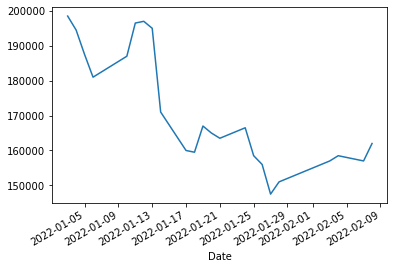

In [141]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

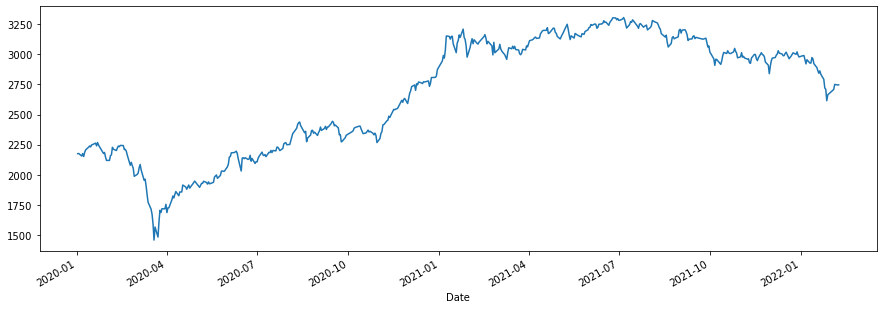

In [146]:
df = fdr.DataReader('KS11', '2020-01-01', '2022-02-08')
df['Close'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

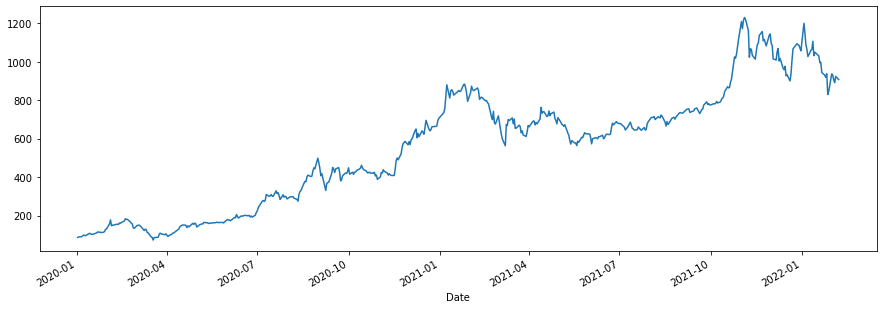

In [152]:
df1 = fdr.DataReader('TSLA', '2020-01-01', '2022-02-08')
df2 = fdr.DataReader('051910', '2020-01-01', '2022-02-08')
df1.Close.plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

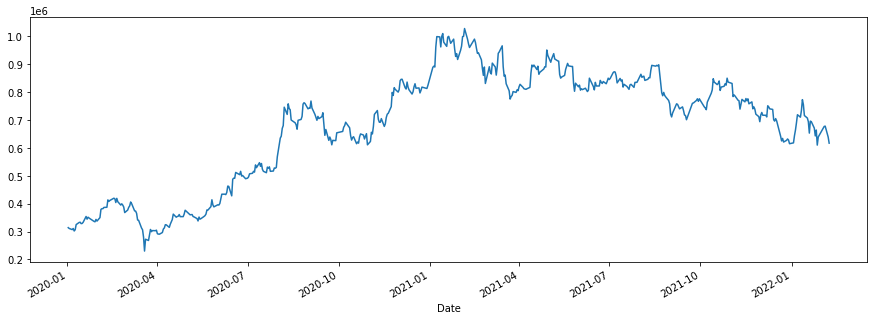

In [153]:
df2.Close.plot(figsize=(15,5))

In [157]:
df1.Close.corr(df2.Close)

0.7656777392909752